# Linear Regression Model Training
### Read in features and labels
### Do some multivariate linear regression
### See how good the fits are

In [14]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

%matplotlib inline

In [137]:
# read in features and labels/examples (see build_features_labels2.ipynb for more info)
features = pd.read_csv('data_final/features.csv')
print features.shape
features[:10]

(314, 47)


,census_tract,bus_age,n_business,n_businesses_11,n_businesses_21,n_businesses_22,n_businesses_23,n_businesses_31,n_businesses_32,n_businesses_33,...,homes_percent_clear,homes_percent_rent,employment_percent,income_med,income_med_owner,income_med_renter,cost_med,cost_med_owner,cost_med_renter,total_amount
0,100,0.541876,0.040244,0.25,0.0,0.0,0.027027,0.000000,0.000,0.006757,...,0.231,0.180,0.372928,0.615612,0.499898,0.147354,0.513829,0.48075,0.9195,0.000000
1,201,0.538251,0.055183,0.00,0.0,0.0,0.032432,0.000000,0.000,0.006757,...,0.111,0.548,0.574586,0.566840,0.684250,0.227237,0.362798,0.56075,0.4870,0.021766
2,202,0.541876,0.055793,0.25,0.0,0.0,0.054054,0.000000,0.000,0.000000,...,0.095,0.578,0.654696,0.434022,0.417067,0.318495,0.422722,0.50650,0.7225,0.059047
3,300,0.486091,0.150000,0.25,0.0,0.0,0.037838,0.058824,0.025,0.027027,...,0.066,0.719,0.602210,0.356844,0.491126,0.270861,0.377983,0.57750,0.6410,0.357875
4,400,0.516499,0.146037,0.00,0.0,0.0,0.021622,0.029412,0.000,0.006757,...,0.034,0.844,0.660221,0.396237,0.347169,0.358638,0.352223,0.46750,0.6275,0.234442
5,500,0.449023,0.061280,0.00,0.0,0.0,0.027027,0.058824,0.000,0.000000,...,0.081,0.652,0.720994,0.317670,0.366111,0.265293,0.331887,0.45475,0.5725,0.011336
6,600,0.387541,0.076220,0.00,0.0,0.0,0.027027,0.029412,0.000,0.000000,...,0.066,0.701,0.689227,0.323496,0.349367,0.281653,0.329718,0.39675,0.5905,0.006188
7,700,0.446434,0.064939,0.25,0.0,0.0,0.032432,0.058824,0.025,0.006757,...,0.052,0.747,0.653315,0.399066,0.505572,0.327974,0.365239,0.60425,0.6205,0.062528
8,800,0.360758,0.040549,0.00,0.0,0.0,0.016216,0.000000,0.000,0.006757,...,0.055,0.712,0.613260,0.261325,0.401084,0.215931,0.296367,0.45200,0.5055,0.007590
9,900,0.264131,0.071341,0.00,0.0,0.0,0.016216,0.088235,0.050,0.006757,...,0.015,0.851,0.715470,0.266590,0.271528,0.229727,0.286334,0.45100,0.4975,0.016920


## Look for correlated features

## See if individual features are correlated w/ labels

NameError: name 'df_new' is not defined

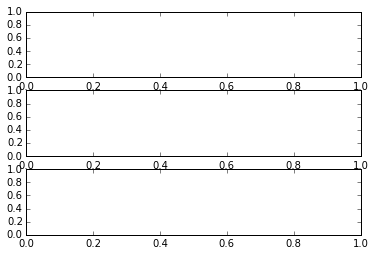

In [138]:
# plot features vs. score
fig, axs = plt.subplots(3,1, sharey=True)
df_new.plot(kind='scatter', x='Population', y='Score', ax=axs[0], figsize=(15, 18))
###axs[0].plot(pop, pop_preds, c='red', linewidth=2)
df_new.plot(kind='scatter', x='Employment_Percentage', y='Score', ax=axs[1])
df_new.plot(kind='scatter', x='Num_Homes', y='Score', ax=axs[2])

NameError: name 'df_new' is not defined

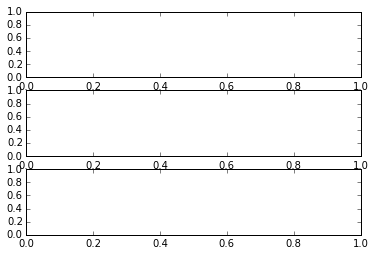

In [139]:
# plot features vs. score
fig, axs = plt.subplots(3, 1, sharey=True)
df_new.plot(kind='scatter', x='Median_Age', y='Score', ax=axs[0], figsize=(15, 18))
df_new.plot(kind='scatter', x='Median_Housing_Cost', y='Score', ax=axs[1])
df_new.plot(kind='scatter', x='Median_Income', y='Score', ax=axs[2])

NameError: name 'df_new' is not defined

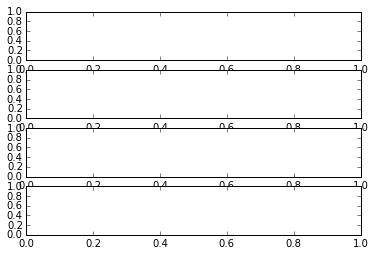

In [140]:
# plot features vs. score
fig, axs = plt.subplots(4, 1, sharey=True)
df_new.plot(kind='scatter', x='Population_Percent_Male', y='Score', ax=axs[0], figsize=(15, 18))
df_new.plot(kind='scatter', x='Population_Percent_Female', y='Score', ax=axs[1])
df_new.plot(kind='scatter', x='Num_Businesses', y='Score', ax=axs[2])
df_new.plot(kind='scatter', x='Num_Businesses_Code', y='Score', ax=axs[3])

## Fit w/ all input features (using statsmodels)

In [141]:
# fit the data
#   + to use feature
#   - to remove feature
#   : to multiply 2 features
#   * to multiply 2 features *and* use both individually
#   C(<feature>) to make <feature> into dummy/categorical feature
model = smf.ols(formula='bus_age ~ n_business + n_businesses_11 - n_businesses_21 - n_businesses_22 + n_businesses_23 +' \
             'n_businesses_31 + n_businesses_32 + n_businesses_33 + n_businesses_42 + n_businesses_44 +' \
             'n_businesses_45 + n_businesses_48 + n_businesses_49 + n_businesses_51 + n_businesses_52 +' \
             'n_businesses_53 + n_businesses_54 + n_businesses_55 + n_businesses_56 + n_businesses_61 +' \
             'n_businesses_62 + n_businesses_71 + n_businesses_72 + n_businesses_81 + n_businesses_92 +' \
             'population + population_percent_male + population_percent_female + age_med + age_med_male + '\
             'age_med_female + minor_percent + adult_percent + homes + homes_percent_mortgage + '\
             'homes_percent_clear + homes_percent_rent + employment_percent + income_med + income_med_owner + '\
             'income_med_renter + cost_med + cost_med_owner + cost_med_renter + total_amount', data=features).fit()
# print the coefficients
model.params

Intercept                   -7.703511e+10
n_business                  -3.173327e+01
n_businesses_11              1.641278e-02
n_businesses_23              2.067515e+00
n_businesses_31              1.377753e-01
n_businesses_32              1.695225e-01
n_businesses_33              1.436786e+00
n_businesses_42              2.400125e+00
n_businesses_44              2.852324e+00
n_businesses_45              4.804114e+00
n_businesses_48              1.911628e+00
n_businesses_49              6.406656e-01
n_businesses_51              3.575470e-01
n_businesses_52              5.730441e-01
n_businesses_53              1.535605e+00
n_businesses_54              9.187278e+00
n_businesses_55              2.635237e-01
n_businesses_56              1.447166e+00
n_businesses_61              5.460723e-01
n_businesses_62              2.576803e+00
n_businesses_71              7.150644e-01
n_businesses_72              1.785851e+00
n_businesses_81              5.538694e+00
n_businesses_92              3.537

In [142]:
# print a summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bus_age   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     2.416
Date:                Sun, 18 Sep 2016   Prob (F-statistic):           1.23e-05
Time:                        15:49:00   Log-Likelihood:                 231.82
No. Observations:                 314   AIC:                            -377.6
Df Residuals:                     271   BIC:                            -216.4
Df Model:                          42                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                 -7.704e+10   2.95e+10     -2.610      0.010     -1.35e+11 -1.89e+10
n_business                  -31.7333     72.441     -0.438      0.662      -174.353   110.886
n_businesses_11               0.0164      0.105      0.156      0.876        -0.190     0.223
n_businesses_23               2.0675      4.148      0.498      0.619        -6.099    10.234
n_businesses_31               0.1378      0.754      0.183      0.855        -1.346     1.621
n_businesses_32               0.1695      1.066      0.159      0.874        -1.929     2.269
n_businesses_33               1.4368      3.318      0.433      0.665        -5.095     7.969
n_businesses_42               2.4001      5.774      0.416      0.678        -8.967    13.767
n_businesses_44               2.8523      6.322      0.451      0.652        -9.594    15.299
n_businesses_45               4.8041     11.038      0.435      0.664       -16.927    26.535
n_businesses_48               1.9116      4.078      0.469      0.640        -6.116     9.939
n_businesses_49               0.6407      1.595      0.402      0.688        -2.500     3.782
n_businesses_51               0.3575      1.321      0.271      0.787        -2.243     2.958
n_businesses_52               0.5730      1.885      0.304      0.761        -3.138     4.284
n_businesses_53               1.5356      3.751      0.409      0.683        -5.850     8.921
n_businesses_54               9.1873     19.035      0.483      0.630       -28.288    46.663
n_businesses_55               0.2635      0.419      0.629      0.530        -0.562     1.089
n_businesses_56               1.4472      3.192      0.453      0.651        -4.836     7.731
n_businesses_61               0.5461      1.529      0.357      0.721        -2.465     3.557
n_businesses_62               2.5768      5.521      0.467      0.641        -8.292    13.446
n_businesses_71               0.7151      1.667      0.429      0.668        -2.567     3.997
n_businesses_72               1.7859      5.414      0.330      0.742        -8.872    12.444
n_businesses_81               5.5387     11.296      0.490      0.624       -16.700    27.778
n_businesses_92               0.0354      0.060      0.590      0.556        -0.083     0.153
population                   -0.2411      0.160     -1.503      0.134        -0.557     0.075
population_percent_male    7.704e+10   2.95e+10      2.610      0.010      1.89e+10  1.35e+11
population_percent_female  7.704e+10   2.95e+10      2.610      0.010      1.89e+10  1.35e+11
age_med                       1.6803      2.109      0.797      0.426        -2.473     5.833
age_med_male                 -0.7134      1.229     -0.580      0.562        -3.134     1.707
age_med_female               -1.0030      1.027     -0.976      0.330        -3.026     1.020
minor_percent                -5.7583      8.798     -0.654  

0.406566919325
0.407529830933
0.070765118648


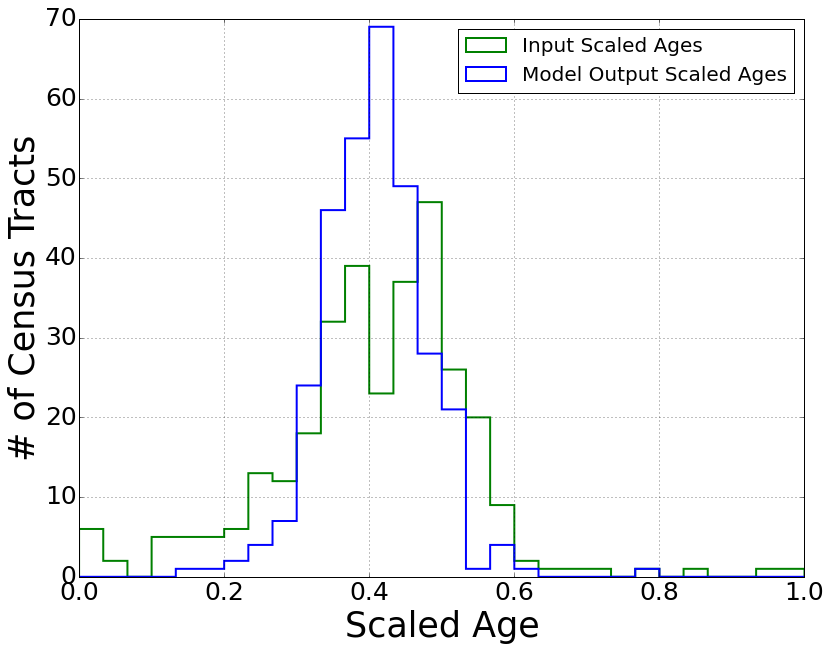

In [143]:
# save just scaled business ages out of dataframe
bus_age = features.bus_age.values

# use coefficients to calculate scaled ages for each census tract
bus_age_pred = model.predict(features)

# make histogram of scaled ages input and output
plt.figure(figsize=(13, 10))
#bins = np.linspace(0,1,50);
#plt.hist(bus_age, bins, linewidth=2, alpha=0.45, label='Input Scaled Ages')
#plt.hist(bus_age_pred, bins, linewidth=2, alpha=0.45, label='Model Output Scaled Ages', color='red')
plt.hist([bus_age_pred,bus_age], bins=30, histtype='step', align='mid', linewidth=2, \
         label=['Model Output Scaled Ages','Input Scaled Ages'])
plt.legend(loc=0,fontsize=20)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('Scaled Age',fontsize=35)
plt.ylabel('# of Census Tracts',fontsize=35)

# print some stats about model output
print np.mean(bus_age_pred)
print np.median(bus_age_pred)
print np.std(bus_age_pred)

In [162]:
# define list of simple NAICS business codes
codes = [11,21,22,23,31,32,33,42,44,45,48,49,51,52,53,54,55,56,61,62,71,72,81,92]
# go through each code
for code in codes:
    # reset new features dataframe
    new_features = features
    
    # increment total business count
    new_features['n_business'] += 1.

    # increment current code count
    new_features['n_businesses_'+str(code)] += 1.
    
    # make predictions for this code for all tracts
    bus_age_pred = model.predict(new_features)
    
    print bus_age_pred

[-32.53740501 -33.07811928 -33.07129288 -36.11955261 -36.01612473
 -33.22739029 -33.7010231  -33.3809166  -32.59599686 -33.59583664
 -33.70510864 -35.91005325 -33.4324646  -34.42273331 -33.63612747
 -32.64661407 -32.71803665 -32.38472176 -33.7097683  -32.43587494
 -33.25049973 -32.07648277 -33.45899582 -32.23020744 -32.74851418
 -32.72275352 -32.98437691 -32.54303932 -32.46596718 -32.28098679
 -32.81163979 -32.73000145 -32.01297569 -33.26478195 -33.06335449
 -32.11148071 -32.47291374 -32.57369423 -32.36320114 -32.29615402
 -31.85540581 -32.37588882 -31.83039093 -32.52394676 -32.61333656
 -33.76888657 -32.59584045 -33.30696106 -33.90828705 -32.1293335
 -32.36149025 -31.90209579 -31.77335167 -32.17586136 -32.03123283
 -31.63420105 -31.64285278 -32.21151161 -32.24947739 -31.8889904
 -31.55174255 -31.98504066 -31.66439056 -31.7797184  -31.81814575
 -32.06040573 -31.68336678 -31.92685509 -31.7503109  -31.56904221
 -31.78142929 -31.75718307 -32.19454193 -32.03063774 -33.2372036
 -32.45528603